### Self-organizing maps (SOM, самоорганизующиеся карты Кохонена)

Self-organizing maps (SOM, самоорганизующиеся карты Кохонена) — знакомая многим классическая конструкция. Их часто поминают на курсах машинного обучения под соусом «а ещё нейронные сети умеют вот так». SOM успели пережить взлёт в 1990-2000 годах: тогда им пророчили большое будущее и создавали новые и новые модификации. Однако, в XXI веке SOM понемногу уходят на задний план. Хоть новые разработки в сфере самоорганизующихся карт всё ещё ведутся (большей частью в Финляндии, родине Кохонена), даже на родном поле визуализации и кластеризации данных карты Кохонена всё чаще уступает t-SNE.

### Основные идеи алгоритма

Каждую эпоху обучения мы перебираем элементы входного датасета. Для каждого элемента мы находим ближайший к этому $x$ нейрон, затем обновляем его веса и веса всех его соседей по слою в зависимости от расстояния до $x$ и от коэффициента кооперации $\sigma$. Чем больше $\sigma$, тем больше нейронов эффективно обновляют веса на каждом шаге. Картинка ниже — графическая интерпретация шагов.

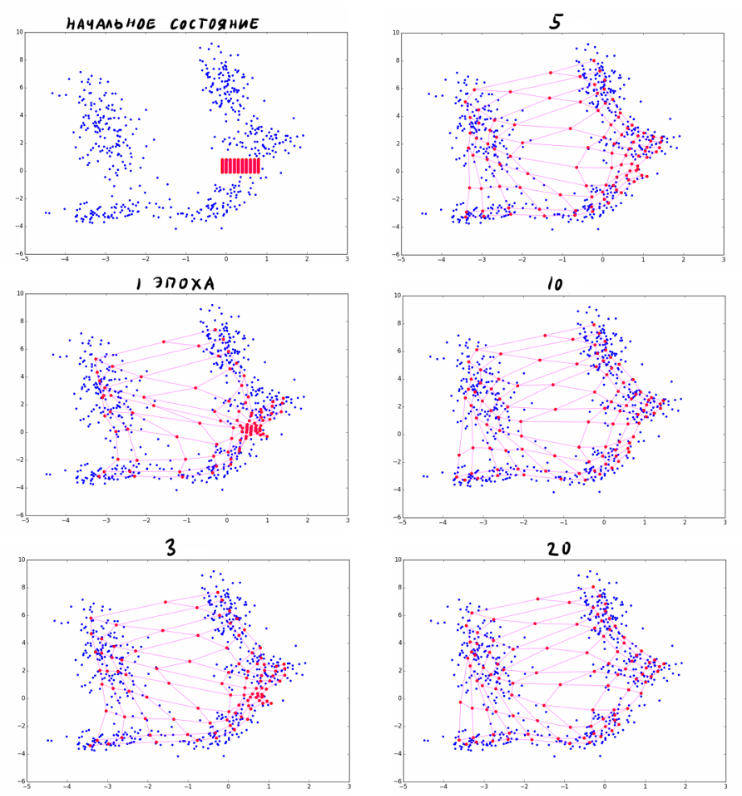

### Топология нейронов

Чуть менее очевидная модификация самоорганизующихся карт, в которой состоит их сила и уникальность, но про которую постоянно забывают, кроется в этапе инициализации $W$ и $D$. Слой Кохонена в примерах постоянно изображают как сетку, но это ни в коей мере не обязательно. Наоборот, всячески советуется подстраивать взаимное расположение нейронов ($D$) в слое под данные.
 $W$ — матрица весов ($d \times M$)
 $D$ ($M \times M$) — матрица расстояний между нейронами в слое.

Как минимум, вместо обычной сетки лучше использовать гексагональную: квадратная сетка искажает результаты в пользу прямых линий, да и менее приятна на вид чем шестиугольная. Если предполагается, что данные циклические, стоит инициализировать $D$, будто нейроны находятся на ленте или даже на торе (см. рис. ниже, номер 1). Если вы пытаетесь вместить в SOM трёхмерные данные, которые заведомо не ложатся на гиперскладку, следует воспользоваться структурой «ворсистый ковёр» (2). Если известно, что какие-то кластеры могут далеко отстоять от других, попробуйте «лепестковую» структуру слоя (3). Совсем хорошо, если известно, что данные имеют некоторую иерархию: тогда можно в качестве $D$ можно взять матрицу расстояний графа этой иерархии (4).

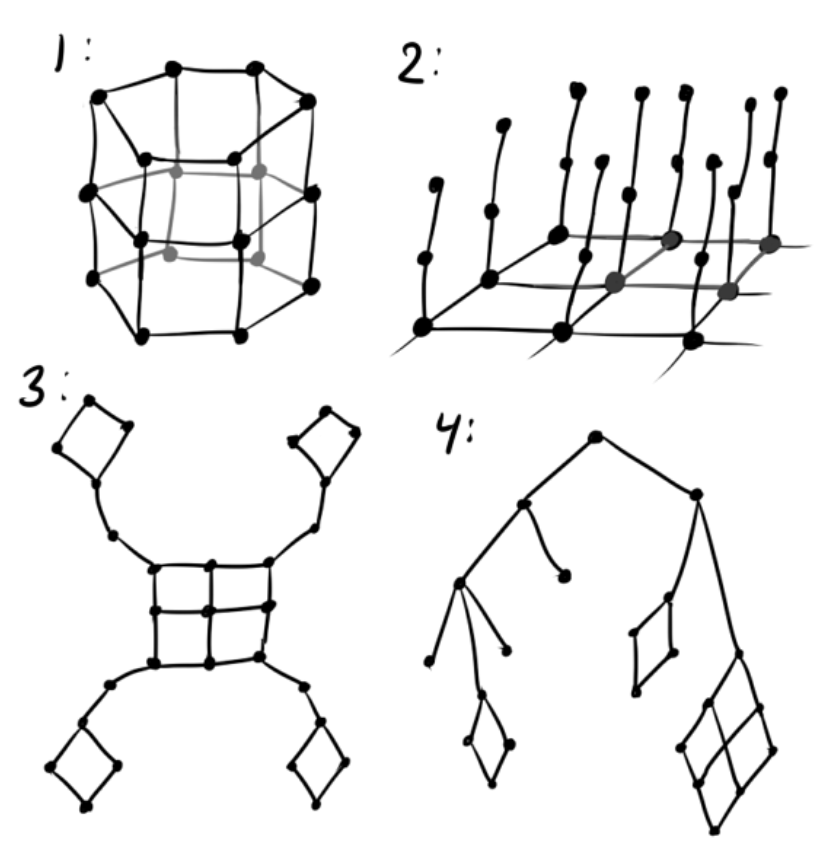

### Сравнение SOM и t-SNE

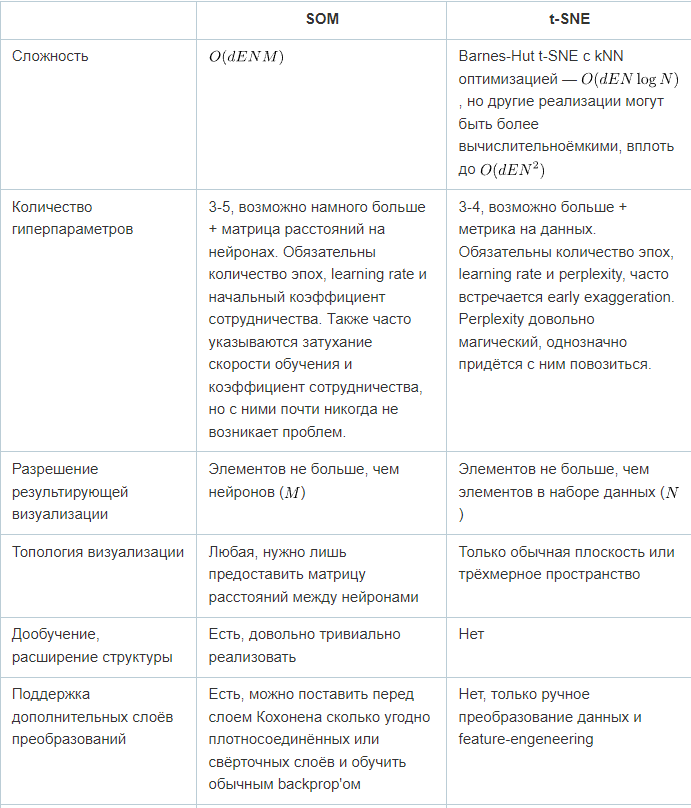

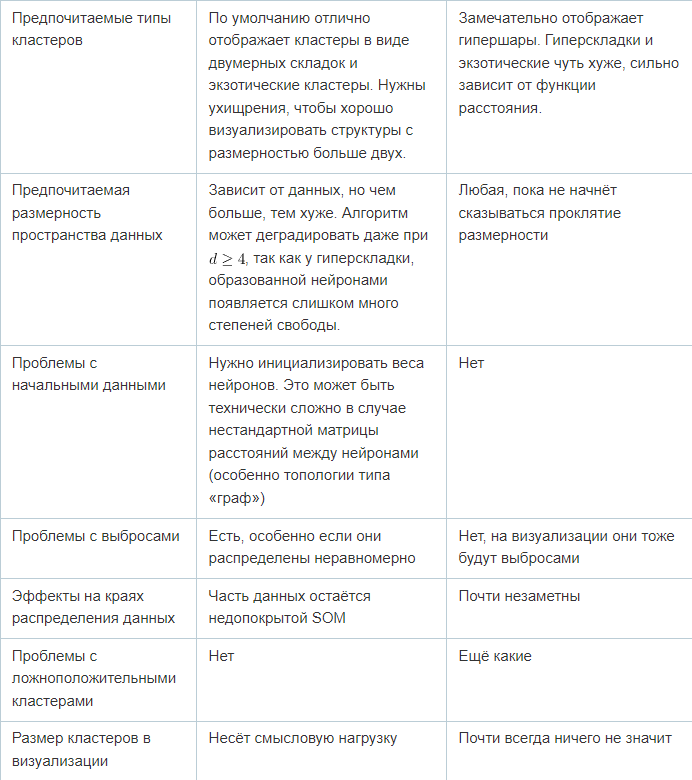

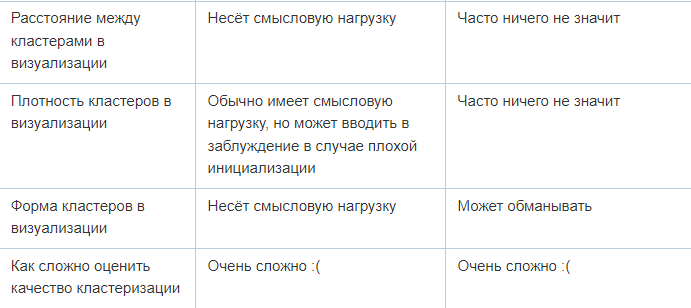

Казалось бы, SOM выигрывает по вычислительной сложности, однако не стоит радоваться раньше времени, не увидев $N^2$ под О-большим. $M$ зависит от желаемого разрешения самоорганизующейся карты, которое зависит от разброса и неоднородности данных, которое, в свою очередь, неявно зависит от $N$ и $d$. Так что в реальной жизни сложность — что-то вроде $O(dN^{\frac{3}{2}}E)$.

В приведённой таблице видны сильные и слабые стороны SOM и t-SNE. Легко можно понять, почему самоорганизующиеся карты уступили место другим методам кластеризации: хоть визуализация картами Кохонена более осмыслена, позволяет наращивание новых нейронов и задание желаемой топологии на нейронах, деградация алгоритма при большом $d$ сильно подкашивает востребованность SOM в современной науке о данных. Кроме того, если визуализацию при помощи t-SNE можно сразу использовать, самоорганизующимся картам нужна постобработка и/или дополнительные усилия по визуализации. Дополнительный негативный фактор — проблемы с инициализацией $W$ и перекрутами.

Значит ли это, что самоорганизующиеся карты остались в прошлом data science? Не совсем. Нет-нет, да и приходится иногда обрабатывать не очень многомерные данные — для этого вполне можно воспользоваться SOM. Визуализации получаются действительно довольно красивые и эффектные. Если не лениться применять доработки алгоритма, SOM отлично находит кластеры на гиперскладках.